In [16]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from matplotlib import ticker

In [ ]:
N = 100
total=np.zeros((1,10))
faulty = []
for i in range(N):
    try:
        test=np.loadtxt('FTRotSurf_3rd_b/FTRotSurf_3rd_b{}.txt'.format(i),delimiter=',')
    except FileNotFoundError:
        faulty.append('{}'.format(i))
        continue
    total=total+test
total = total/(N-len(faulty))
print("Dead files: ", faulty)
N = print(total)

Dead files:  []
[[0.         0.00105263 0.00210526 0.00315789 0.00421053 0.00526316
  0.00631579 0.00736842 0.00842105 0.00947368 0.01052632 0.01157895
  0.01263158 0.01368421 0.01473684 0.01578947 0.01684211 0.01789474
  0.01894737 0.02      ]
 [0.9989     0.8824     0.778      0.6963     0.6137     0.5429
  0.4833     0.4331     0.3801     0.3532     0.3098     0.2855
  0.2544     0.233      0.2182     0.1996     0.1801     0.1658
  0.1497     0.1394    ]
 [0.0011     0.0168     0.0267     0.0363     0.0434     0.046
  0.0476     0.0542     0.0514     0.0537     0.0519     0.0541
  0.051      0.0519     0.0513     0.0531     0.0543     0.0537
  0.0461     0.0462    ]
 [0.         0.1008     0.1953     0.2674     0.3429     0.4111
  0.4691     0.5127     0.5685     0.5931     0.6383     0.6604
  0.6946     0.7151     0.7305     0.7473     0.7656     0.7805
  0.8042     0.8144    ]
 [0.9988     0.8487     0.7228     0.6006     0.4994     0.4209
  0.3467     0.2867     0.2431     0.198 

In [ ]:
np.savetxt('text/FTRotSurf_3rd_b.txt', total, delimiter=",")
#np.savetxt('text/RotSurf_3rd_f.txt', total, delimiter=",")
#np.savetxt('text/FTSteane_3rd_k+.txt', total, delimiter=",")

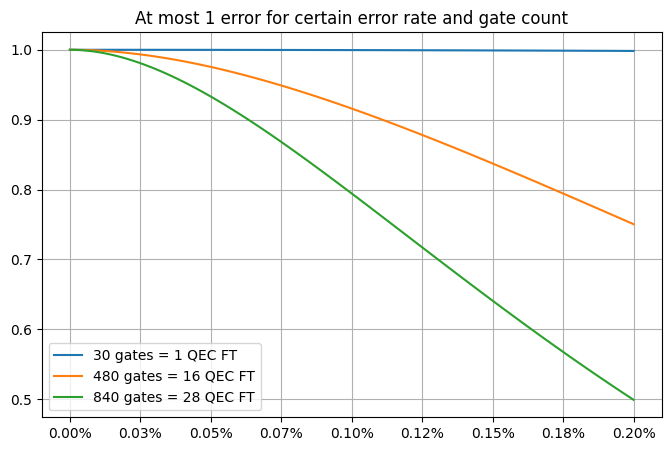

In [5]:
# p = 0.994
# print(p**150)
# print((p**149)*150*(1-p))

g = [30,16*30,28*30]
fig, ax = plt.subplots(figsize=(8,5))

for j in g:
    p = np.linspace(0.998,1,100)
    y = [(i**(j))+(i**(j-1))*j*(1-i) for i in p]
    p = [1-i for i in p]
    ax.plot(p,y,label="{} gates".format(j)+" = {} QEC FT".format(int(j/30)))

#ax.hlines(0.5,0,0.01, color="red", linewidth=3, linestyles="dotted")
ax.grid()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
plt.legend()
plt.title("At most 1 error for certain error rate and gate count")
plt.show()